## Modeling Part 2

In [1]:
#Redo the modeling with the data leakage fixed

In [1]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [3]:
df_audio = pd.read_csv ('updated_audio_features.csv')

In [4]:
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27549 entries, 0 to 27548
Columns: 141 entries, Unnamed: 0 to Day_of_Week
dtypes: float64(17), int64(124)
memory usage: 29.6 MB


### Train/Test Split

In [5]:
# y is only the COVID status of the patient
y = df_audio['status_COVID-19']

In [6]:
# X Sound features
X = df_audio.drop(['status_COVID-19','status_healthy'], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

### Model

In [8]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt 
import seaborn as sns

In [9]:
pipeline = {} 

pipeline['Random Forest'] = RandomForestClassifier()
pipeline['Weighted Random Forest'] = RandomForestClassifier(class_weight='balanced')
pipeline['Ridge Classifier'] = RidgeClassifier()
pipeline['KNN'] = KNeighborsClassifier()
pipeline['Decision Tree'] = DecisionTreeClassifier()
pipeline['Naive Bayes'] = GaussianNB()

In [13]:
model_list = ['Random Forest', 'Weighted Random Forest', 'Ridge Classifier', 'KNN', 'Decision Tree', 'Naive Bayes']
auc_list = []
cm_list = []

In [14]:
for i, model in pipeline.items(): 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #What are my target names
    print(i, 'Classification Report')
    print(classification_report(y_test,y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(y_test, y_pred))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7915
           1       0.67      0.09      0.16       350

    accuracy                           0.96      8265
   macro avg       0.82      0.54      0.57      8265
weighted avg       0.95      0.96      0.94      8265

Weighted Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7915
           1       0.71      0.09      0.15       350

    accuracy                           0.96      8265
   macro avg       0.84      0.54      0.57      8265
weighted avg       0.95      0.96      0.94      8265

Ridge Classifier Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7915
           1       0.46      0.06      0.11       350

    accuracy                           0.96      8265
   macro

### Confusion Matrix

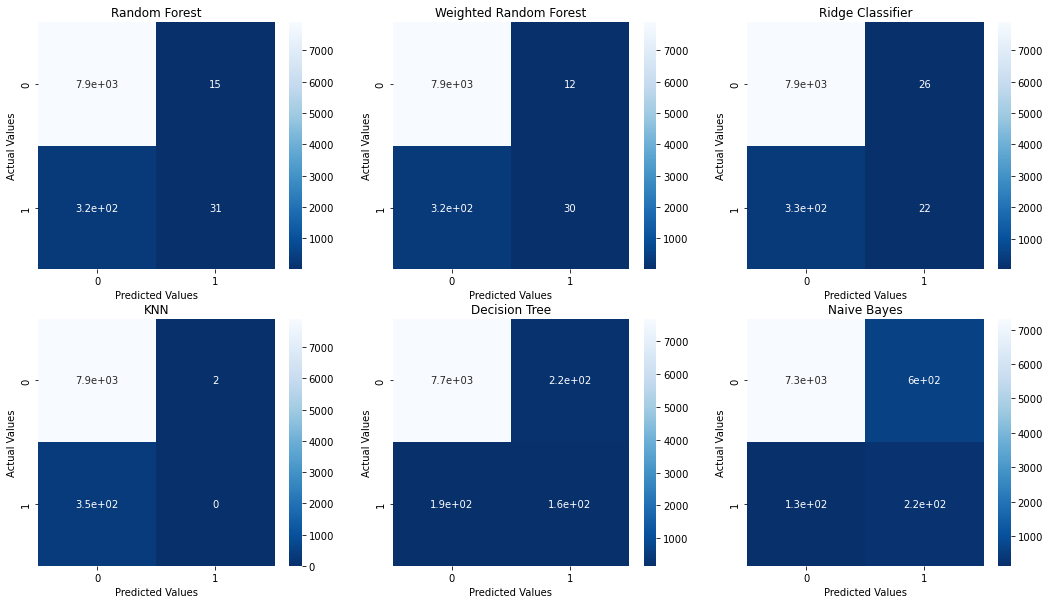

In [15]:
# Ploting Confusion Matrix
fig = plt.figure(figsize = (18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2,3,i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap='Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

In [16]:
#AUC
result_df = pd.DataFrame({'Model': model_list, 'AUC': auc_list})
result_df

,Model,AUC
0,Random Forest,0.54
1,Weighted Random Forest,0.54
2,Ridge Classifier,0.53
3,KNN,0.50
4,Decision Tree,0.72
5,Naive Bayes,0.78


### Feature Importance

In [17]:
print(pipeline)

{'Random Forest': RandomForestClassifier(), 'Weighted Random Forest': RandomForestClassifier(class_weight='balanced'), 'Ridge Classifier': RidgeClassifier(), 'KNN': KNeighborsClassifier(), 'Decision Tree': DecisionTreeClassifier(), 'Naive Bayes': GaussianNB()}


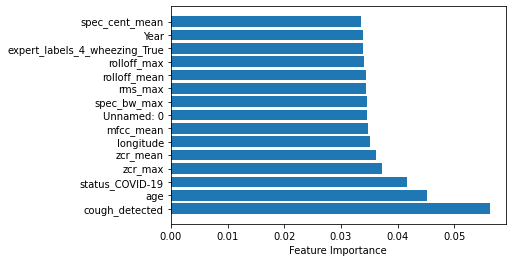

<Figure size 864x432 with 0 Axes>

In [18]:
#for i, model in pipeline.items():
sort = pipeline['Random Forest'].feature_importances_.argsort()
plt.barh(df_audio.columns[sort][::-1][0:15], pipeline['Random Forest'].feature_importances_[sort][::-1][0:15])
plt.xlabel("Feature Importance")
plt.figure(figsize=(12, 6))
plt.show() 

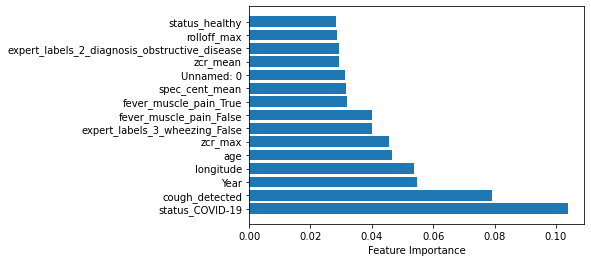

<Figure size 864x432 with 0 Axes>

In [19]:
sort = pipeline['Decision Tree'].feature_importances_.argsort()
plt.barh(df_audio.columns[sort][::-1][0:15], pipeline['Decision Tree'].feature_importances_[sort][::-1][0:15])
plt.xlabel("Feature Importance")
plt.figure(figsize=(12, 6))
plt.show() 